#Problem statement

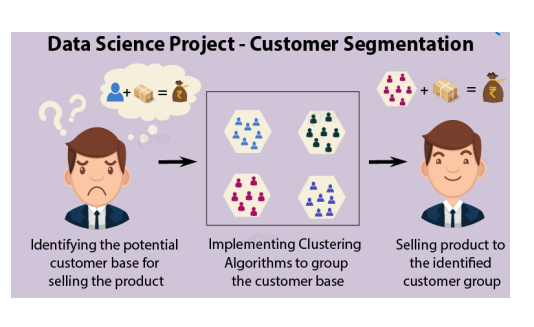

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#EDA

In [ ]:
import numpy  as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px


plt.style.use("ggplot")

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Project/customer-segmentation-dataset/Mall_Customers.csv')

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


No null values in the dataset

In [ ]:
df['CustomerID'] = df['CustomerID'].astype(str)

In [ ]:
count_gender = df['Gender'].value_counts()

In [ ]:
dis_gender = go.Bar(
    x = count_gender.index,
    y = count_gender.values,
)
fig = go.Figure(dis_gender)
fig.update_traces(marker_color='#8D2828', opacity=.6)

fig.update_layout(title_text="A Figure Displaying Gender")
fig.show()

Number of male is less than female in the dataset

In [ ]:
count_age = df['Age'].value_counts()


In [ ]:
dis_age = go.Bar(
    x = count_age.index,
    y = count_age.values
)

fig = go.Figure(dis_age)
fig.update_traces(marker_color='#E1701A', opacity=.8)
fig.update_layout(title_text='A Figure Displaying Age')
fig.show()

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


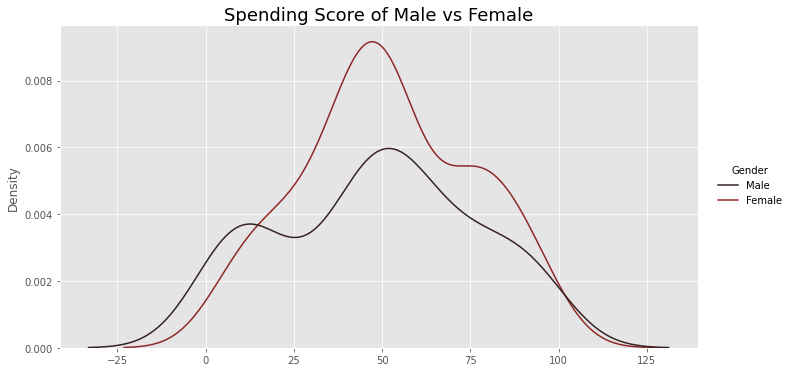

In [ ]:
sns.displot(x=df['Spending Score (1-100)'].values, palette=['#362222','#8D2828'], kind='kde', hue=df['Gender'],aspect=2)

plt.title("Spending Score of Male vs Female", fontsize=18)
plt.show()

shows that female spending more than the male.

<Figure size 360x432 with 0 Axes>

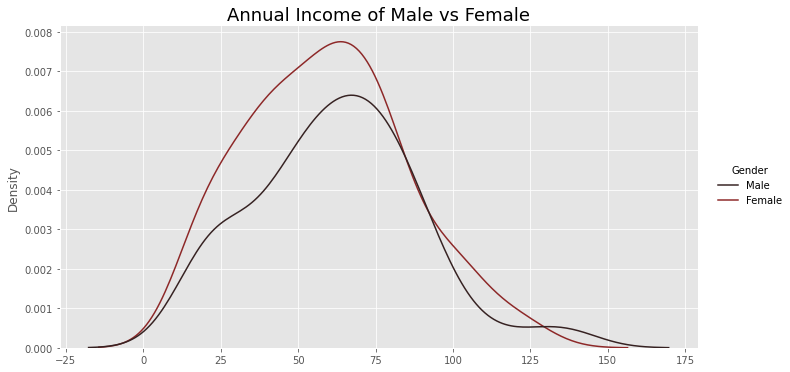

In [ ]:
plt.figure(figsize=(5,6))
sns.displot(x=df['Annual Income (k$)'].values, palette=['#362222','#8D2828'], kind='kde', hue=df['Gender'],aspect=2)

plt.title('Annual Income of Male vs Female', fontsize=18)
plt.show()

female spending more has also income more than male in more data points.

In [ ]:
dis_age = go.Box(
    y = df['Spending Score (1-100)'],
    name ='Spending Score'
)

fig = go.Figure(dis_age)
fig.update_traces(marker_color='#171717', opacity=.8)
fig.update_layout(title_text='A Figure Displaying Spending Score')
fig.show()

median for spending score is 50 and 50% data points are between  34.5 and 73

In [ ]:
dis_age = go.Box(
    y = df['Annual Income (k$)'],
    name='Annual Income'
)

fig = go.Figure(dis_age)
fig.update_traces(marker_color='#171717', opacity=.8)
fig.update_layout(title_text='A Figure Displaying Annual Income')
fig.show()

Annual income has outliers as shown in above boxplot.

In [ ]:
fig = px.scatter(x = df['Annual Income (k$)'],y = df['Spending Score (1-100)'], color=df['Gender'], title="Annual Income vs Spending Score")
fig.show()

In [ ]:
fig = px.scatter_3d(x = df['Annual Income (k$)'],y = df['Spending Score (1-100)'], z=df['Age'], color=df['Gender'], title='Annual Income vs Spending Score with Age')
fig.show()

___________

# Build Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.cluster        import KMeans , MiniBatchKMeans

In [ ]:
X = df.iloc[:,-2:].values

In [ ]:
X_train, X_test = train_test_split(X, random_state=42, test_size=.2)

In [ ]:
elbow = []
for i in range(1,11):
    k_means = KMeans(n_clusters=i)
    k_means.fit(X_train)
    elbow.append(k_means.inertia_)

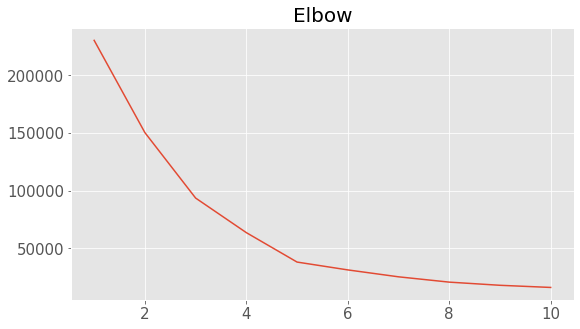

In [ ]:
plt.figure(figsize=(9,5))

plt.plot(range(1,11), elbow)

plt.title("Elbow", fontsize=20)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [ ]:
k_means = KMeans(n_clusters=6, random_state=42, init='k-means++',)

In [ ]:
k_means.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [ ]:
print("Inertia  :", k_means.inertia_)

Inertia  : 31354.80916875522


In [ ]:
X_predict = k_means.predict(X_test)

In [ ]:
X_test[X_predict==0,0]

array([ 78,  71,  87,  88,  98, 101,  78,  70,  78,  78,  85])

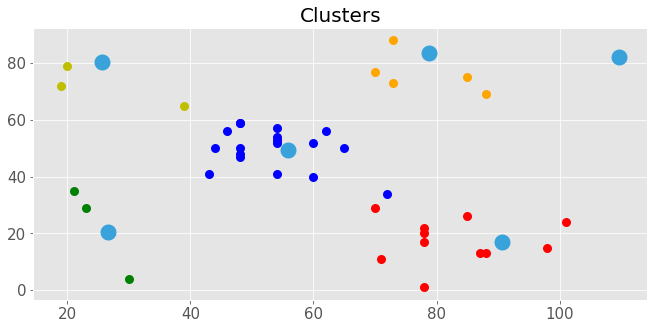

In [ ]:
plt.figure(figsize=(11,5))

plt.scatter(X_test[X_predict==0,0], X_test[X_predict==0,1], color='red', linewidths=3)
plt.scatter(X_test[X_predict==1,0], X_test[X_predict==1,1], color='b', linewidths=3)
plt.scatter(X_test[X_predict==2,0], X_test[X_predict==2,1], color='y', linewidths=3)
plt.scatter(X_test[X_predict==3,0], X_test[X_predict==3,1], color='black', linewidths=3)
plt.scatter(X_test[X_predict==4,0], X_test[X_predict==4,1], color='green', linewidths=3)
plt.scatter(X_test[X_predict==5,0], X_test[X_predict==5,1], color='orange', linewidths=3)

plt.scatter(k_means.cluster_centers_[:,0] , k_means.cluster_centers_[:,1], color='#39A2DB', linewidths=10)

plt.title("Clusters", fontsize=20)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

We have the finally 5 types of clusters and light blue is showing the cluster center.

#Conclusion
Finally, based on our machine learning technique we may deduce that to increase the profits of the mall, the mall authorities should target people belonging to green cluster and red cluster .